# SME0878 - Mineração Estatística de Dados
## Instituto de Ciências Matemáticas e Computação - Unversidade de São Paulo
### Trabalho 3
* Alef Segura Santos, 9762942
* Gustavo de Moura Souza, 9762981

In [1]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns

from tqdm import tqdm

from sklearn.datasets import make_circles
from sklearn.model_selection import KFold, cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Questão 1
Considere	a	base	dados	gerado	pela	função	skdata.make_circles (noise	=	0.2),	
conforme	feito	em	aula.
Compare	os	seguintes	algoritmos:
(a)	Redes	Neurais
(b)	Naive	Bayes
(c)	Knn
(d)	Random	forest
Use	as	métricas	Accuracy, F1, Precision,	Recall. 
Use o	método k-fold	cross	validation	com	k=10.

 50%|█████     | 8/16 [00:38<00:37,  4.67s/it]/home/alefsegura/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/alefsegura/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
100%|██████████| 16/16 [00:38<00:00,  1.68s/it]


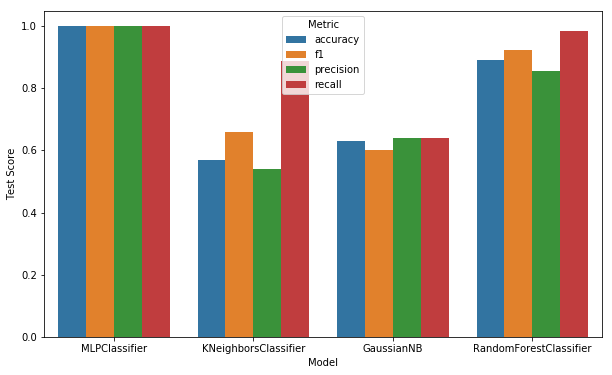

In [3]:
dataset = make_circles()

X = dataset[0]
y = dataset[1]

kf = KFold(10)

models = [
    MLPClassifier(max_iter=2000),
    KNeighborsClassifier(),
    GaussianNB(),
    RandomForestClassifier()
]

metrics = ['accuracy','f1','precision','recall']

scores = []
with tqdm(total=len(metrics)*len(models)) as bar:
    for model in models:
        for metric in metrics:
            cv = cross_validate(model, X, y, cv=kf, return_train_score=True, scoring=metric)
            score = {}
            score['Metric'] = metric
            score['Model'] = type(model).__name__
            score['Test Score'] = np.mean(cv['test_score'])
            score['Train Score'] = np.mean(cv['train_score'])
            scores.append(score)
            bar.update()

df_scores = pd.DataFrame(scores)
            
# Resultados
plt.figure(figsize=(10,6))
sns.barplot(x=df_scores.Model, y=df_scores['Test Score'], hue=df_scores.Metric)
plt.show()

## Questão 2

Considere a	partir	de	agora a	base	de	dados	sobre	diabetes:
https://www.kaggle.com/uciml/pima-indians-diabetes-database

2	- Verifique	como a	classifição	muda	quando	consideramos	o	método k-fold	
cross	validation.	Ou	seja,	faça	um	gráfico	da	medida	Precison	em	função	de	k	
para	os	algoritmos	Redes	Neurais	e	Random	Forest.

## Questão 3
3	- Compare	os classificadores	Redes	Neurais,	Naïve	Bayes	e Random	Forest	para	
k=10	(k-fold	cross	validation estratificado)	em	termos	da	curva	ROC. Qual	
classificador	é	o	melhor?	Justifique.

## Questão 4
– Usando	o	método	que	seleciona	apenas	um	atributo	por	vez	(univariado,	
teste	qui-quadrado),	faça	uma	curva	da	medida	F1	em	função	do	número	de	
atributos	considerados.	Isto	é,	obtenha	F1 para	o	atributo	mais	importante,	
depois	para	os	dois	mais	importantes	e	assim	por	diante.

## Questão 5
– Projete	os	dados	usando	PCA	e	faça	um	gráfico	de	F1	em	termos	do	número	
de	components.	Quantos	components	oferecem	a	maior	taxa	de	acerto?	Compare	
com	a	curva	“cumulative	explained	variance”	versus	“number	of	components”	e	
explique	os	resultados.

## Questão 6
Considere agora a	base	de	dados	do	Titanic,	conforme	descrita	em:
https://paulovasconcellos.com.br/competicao-kaggle-titanic-tutorial5b11993774f7
Construa	a	curva	ROC	para	as	redes	neurais	e	random	forest.
Identifique	os	atributos	mais	importantes	usando	o	método	wrapper.	Construa	
um	gráfico	da	medida	Precision	em	função	do	número	de	atributos	usados.	É	
possível	melhorar	a	classificação	considerando	um	número	reduzido	de	
atributos?